# Exploratory Data Analysis

In [1]:
import pandas as pd
from textblob import TextBlob
import re

In [2]:
# read data
review_df = pd.read_csv('movie_review.csv')

In [3]:
review_df.head()

,Movie,Critic,Rating,Source,Review,Date
0,Midway,Sara Michelle Fetters,rotten,MovieFreak.com,"There wasn't any tension or suspense, and by t...","November 17, 2019"
1,Midway,Matt Brunson,rotten,Film Frenzy,Director Roland Emmerich's 1996 smash Independ...,"November 16, 2019"
2,Midway,Jackie K. Cooper,fresh,jackiekcooper.com,"Good historical recounting, and solid special ...","November 15, 2019"
3,Midway,Abigail Camarillo,rotten,Chilango.com,The director of The Day After Tomorrow does no...,"November 15, 2019"
4,Midway,Mark Kermode,rotten,Kermode & Mayo's Film Review,"He's Mr. Bombastic, but he's not very fantasti...","November 15, 2019"


In [4]:
def preprocess_text(review):
    # change all uppercase to lowercase and remove all punctuation
    review_text = review.apply(lambda x: ' '.join(x.lower() for x in x.split()))
    review_text = review_text.str.replace('[^\w\s]', '')
    # remove the "Full review in Spanish" at the end of some reviews which use Spanish originally
    review_text = review_text.apply(lambda x: re.sub(' full review in spanish', '', x))
    return review_text

In [5]:
review_df['Review_text'] = preprocess_text(review_df['Review'])

In [6]:
review_df.head()

,Movie,Critic,Rating,Source,Review,Date,Review_text
0,Midway,Sara Michelle Fetters,rotten,MovieFreak.com,"There wasn't any tension or suspense, and by t...","November 17, 2019",there wasnt any tension or suspense and by the...
1,Midway,Matt Brunson,rotten,Film Frenzy,Director Roland Emmerich's 1996 smash Independ...,"November 16, 2019",director roland emmerichs 1996 smash independe...
2,Midway,Jackie K. Cooper,fresh,jackiekcooper.com,"Good historical recounting, and solid special ...","November 15, 2019",good historical recounting and solid special e...
3,Midway,Abigail Camarillo,rotten,Chilango.com,The director of The Day After Tomorrow does no...,"November 15, 2019",the director of the day after tomorrow does no...
4,Midway,Mark Kermode,rotten,Kermode & Mayo's Film Review,"He's Mr. Bombastic, but he's not very fantasti...","November 15, 2019",hes mr bombastic but hes not very fantastic


In [7]:
# add more information about review text
review_df['polarity'] = review_df['Review'].map(lambda text: TextBlob(text).sentiment.polarity)
review_df['word_count'] = review_df['Review'].apply(lambda x: len(str(x).split()))

In [8]:
review_df['Date'] = pd.to_datetime(review_df['Date'])

In [9]:
review_df.head()

,Movie,Critic,Rating,Source,Review,Date,Review_text,polarity,word_count
0,Midway,Sara Michelle Fetters,rotten,MovieFreak.com,"There wasn't any tension or suspense, and by t...",2019-11-17,there wasnt any tension or suspense and by the...,0.000000,23
1,Midway,Matt Brunson,rotten,Film Frenzy,Director Roland Emmerich's 1996 smash Independ...,2019-11-16,director roland emmerichs 1996 smash independe...,-0.097619,29
2,Midway,Jackie K. Cooper,fresh,jackiekcooper.com,"Good historical recounting, and solid special ...",2019-11-15,good historical recounting and solid special e...,0.092857,23
3,Midway,Abigail Camarillo,rotten,Chilango.com,The director of The Day After Tomorrow does no...,2019-11-15,the director of the day after tomorrow does no...,0.183333,17
4,Midway,Mark Kermode,rotten,Kermode & Mayo's Film Review,"He's Mr. Bombastic, but he's not very fantasti...",2019-11-15,hes mr bombastic but hes not very fantastic,-0.153846,8


In [10]:
import matplotlib.pyplot as plt
plt.style.use('seaborn')

## Distributions of Sentiment polarity score and Word count in reviews

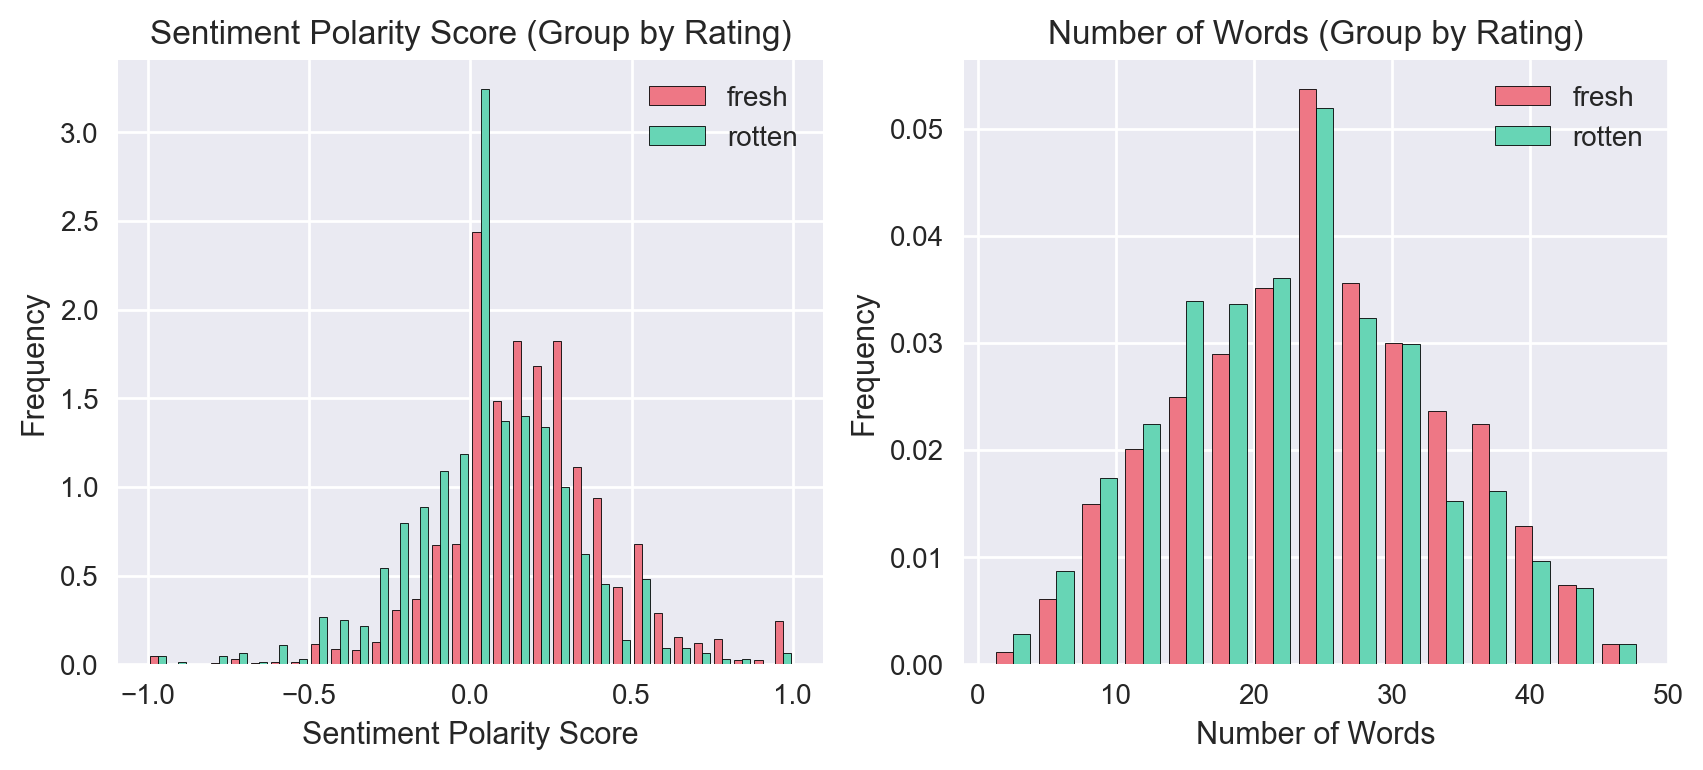

In [11]:
fig, axes = plt.subplots(nrows=1, ncols=2, dpi=200, figsize=(10, 4))
ax0, ax1 = axes.flatten()

ax0.hist((review_df[review_df['Rating']=='fresh']['polarity'], review_df[review_df['Rating']=='rotten']['polarity']), 
         label=['fresh', 'rotten'], bins=32, color=['#EE7785', '#67D5B5'], edgecolor='black', density=True)
ax0.legend()
ax0.set_xlabel('Sentiment Polarity Score')
ax0.set_ylabel('Frequency')
ax0.set_title('Sentiment Polarity Score (Group by Rating)')

ax1.hist((review_df[review_df['Rating']=='fresh']['word_count'], review_df[review_df['Rating']=='rotten']['word_count']), 
         label=['fresh', 'rotten'], bins=15, color=['#EE7785', '#67D5B5'], edgecolor='black', density=True)
ax1.legend()
ax1.set_xlabel('Number of Words')
ax1.set_ylabel('Frequency')
ax1.set_title('Number of Words (Group by Rating)')
plt.show()

In [12]:
pos_count = review_df[review_df['polarity']>0].shape[0]
neg_count = review_df[review_df['polarity']<0].shape[0]
zero_count = review_df[review_df['polarity']==0].shape[0]
total_count = review_df.shape[0]

print('Proportion of positive sentiment polarity score is {:.2f}. \n'.format(pos_count/total_count),
      'Proportion of negative sentiment polarity score is {:.2f}. \n'.format(neg_count/total_count), 
      'Proportion of zero sentiment polarity score is {:.2f}. '.format(zero_count/total_count))

Proportion of positive sentiment polarity score is 0.68. 
 Proportion of negative sentiment polarity score is 0.22. 
 Proportion of zero sentiment polarity score is 0.09. 


## Variation of Ratings with Date

![](https://github.com/hujiayin/WebAnalytics/blob/master/Classifier%20for%20reviews/Date%20filter.png?raw=true)

## Text Visualization

In [13]:
from sklearn.feature_extraction.text import CountVectorizer
from nltk.corpus import stopwords
stopword = stopwords.words('english')

In [14]:
def get_top_m_ngrams(corpus, m=None, ngram=(1, 1), stopwords=None):
    vectorizer = CountVectorizer(stop_words = stopwords, ngram_range=ngram).fit(corpus)
    bag_of_words = vectorizer.transform(corpus)
    sum_words = bag_of_words.sum(axis=0) 
    words_freq = [(word, sum_words[0, idx]) for word, idx in vectorizer.vocabulary_.items()]
    words_freq =sorted(words_freq, key = lambda x: x[1], reverse=True)
    return words_freq[:m]

In [15]:
# Lemmatize the review
from textblob import Word
review_df['Review_text_lemma'] = review_df['Review_text'].apply(lambda x: " ".join([Word(word).lemmatize() for word in x.split()]))

### Top Unigrams

In [16]:
# With stopwords
common_words = get_top_m_ngrams(review_df['Review_text_lemma'], m=20)
common_word_df = pd.DataFrame(common_words, columns = ['Word' , 'Count']).sort_values(by='Count', ascending=False)
common_word_df

,Word,Count
0,the,3640
1,and,2266
2,it,2061
3,of,2048
4,to,1691
5,is,1462
6,in,983
7,that,905
8,but,708
9,film,685


In [17]:
# Without stopwords
common_words_nostop = get_top_m_ngrams(review_df['Review_text_lemma'], m=20, stopwords='english')
common_word_nostop_df = pd.DataFrame(common_words_nostop, columns = ['Word' , 'Count']).sort_values(by='Count', ascending=False)
common_word_nostop_df

,Word,Count
0,film,685
1,movie,463
2,joker,255
3,like,245
4,ha,241
5,make,214
6,story,211
7,just,198
8,performance,189
9,character,172


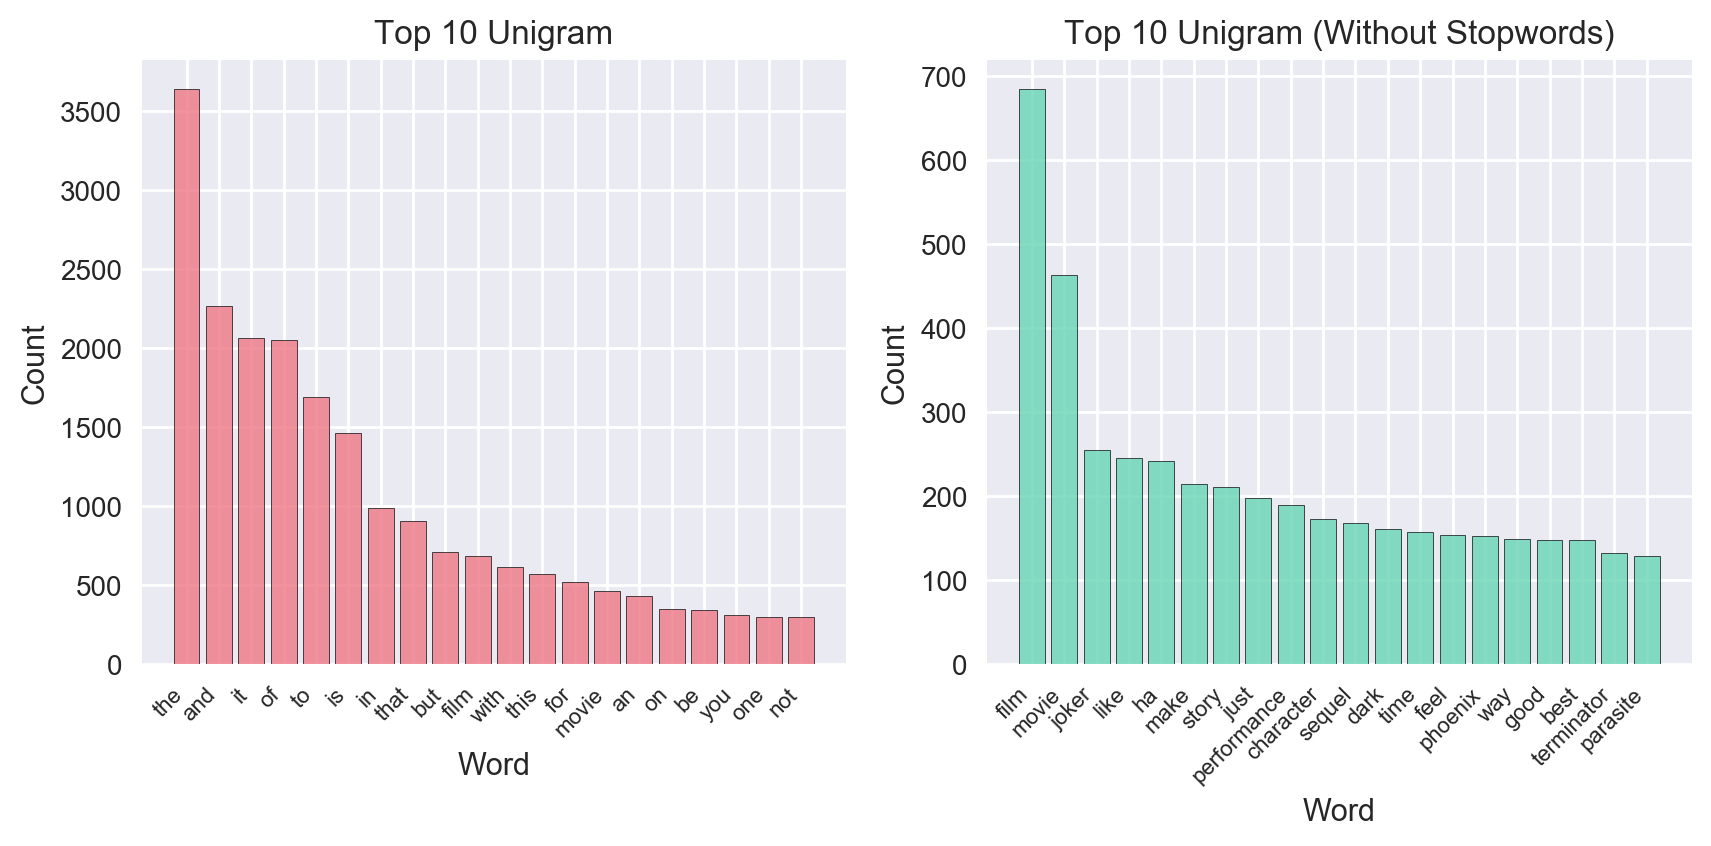

In [18]:
fig, axes = plt.subplots(nrows=1, ncols=2, dpi=200, figsize=(10, 4))
ax0, ax1 = axes.flatten()

ax0.bar(common_word_df['Word'], common_word_df['Count'], 
        color=['#EE7785'], edgecolor='black', alpha=0.8)
ax0.set_xlabel('Word')
ax0.set_xticklabels(common_word_df['Word'], rotation=45, size=8, horizontalalignment="right")
ax0.set_ylabel('Count')
ax0.set_title('Top 10 Unigram')

ax1.bar(common_word_nostop_df['Word'], common_word_nostop_df['Count'], 
         color=['#67D5B5'], edgecolor='black', alpha=0.8)
ax1.set_xlabel('Word')
ax1.set_xticklabels(common_word_nostop_df['Word'], rotation=45, size=8, horizontalalignment="right")
ax1.set_ylabel('Count')
ax1.set_title('Top 10 Unigram (Without Stopwords)')
plt.show()

### Top bigrams

In [19]:
# With stopwords
common_bigram = get_top_m_ngrams(review_df['Review_text_lemma'], m=20, ngram=(2, 2))
common_bigram_df = pd.DataFrame(common_bigram, 
                                columns = ['Word' , 'Count']).sort_values(by='Count', ascending=False)

# Without stopwords
common_bigram_nostop = get_top_m_ngrams(review_df['Review_text_lemma'], m=20, ngram=(2, 2), stopwords='english')
common_bigram_nostop_df = pd.DataFrame(common_bigram_nostop, 
                                       columns = ['Word' , 'Count']).sort_values(by='Count', ascending=False)


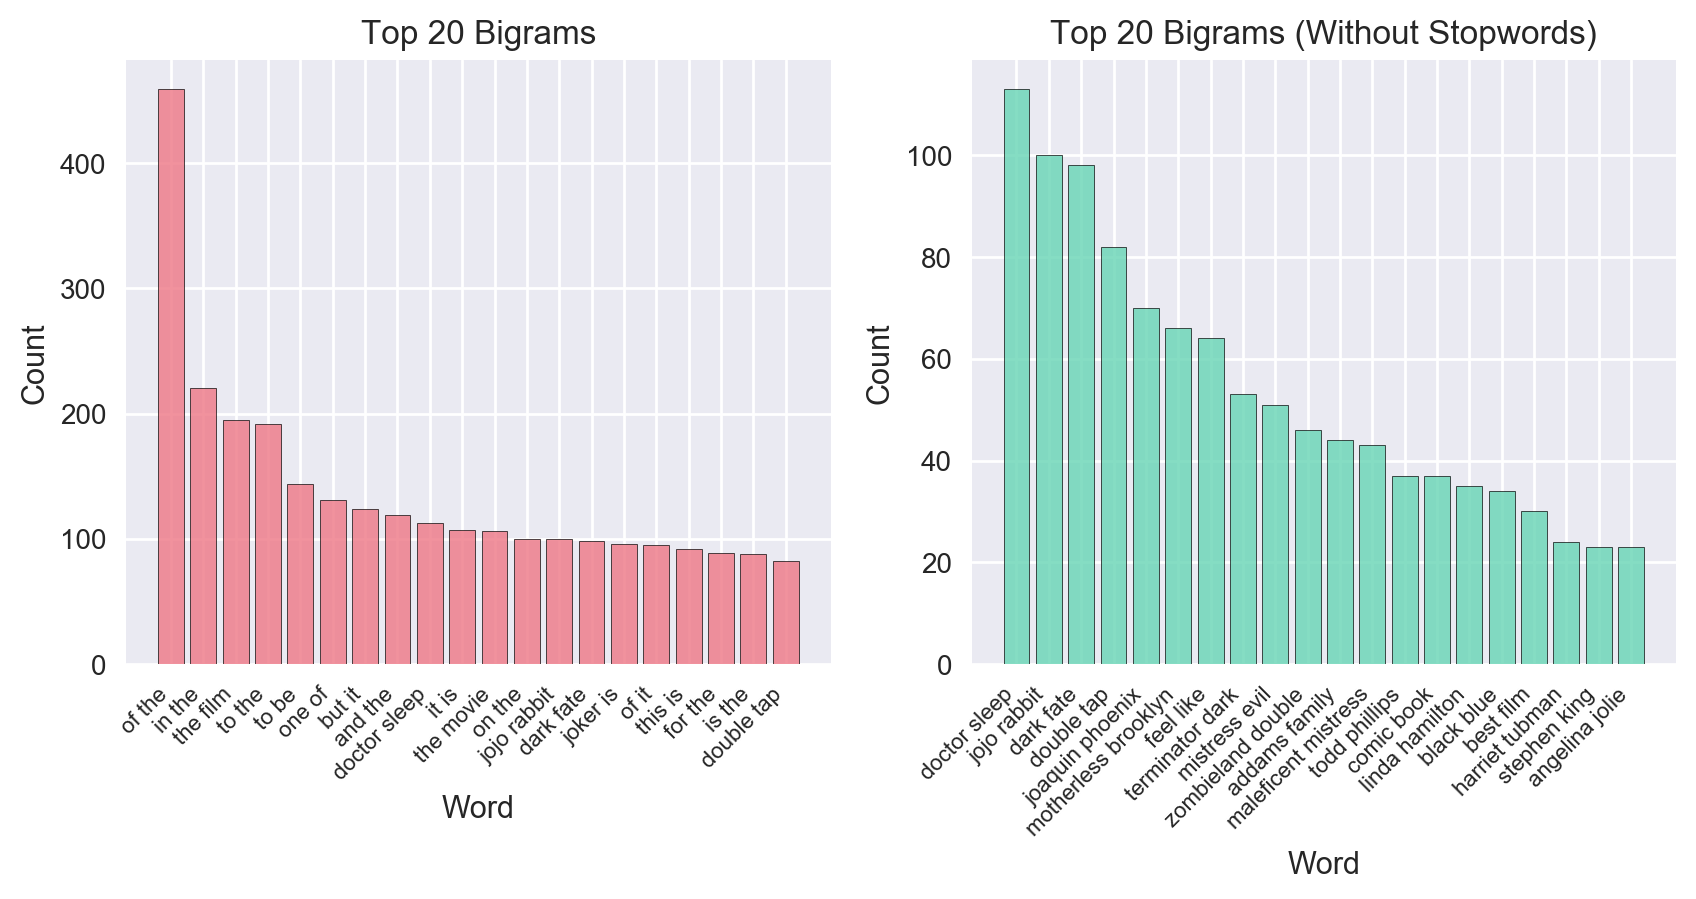

In [20]:
fig, axes = plt.subplots(nrows=1, ncols=2, dpi=200, figsize=(10, 4))
ax0, ax1 = axes.flatten()

ax0.bar(common_bigram_df['Word'], common_bigram_df['Count'], 
        color=['#EE7785'], edgecolor='black', alpha=0.8)
ax0.set_xlabel('Word')
ax0.set_xticklabels(common_bigram_df['Word'], rotation=45, size=8, horizontalalignment="right")
ax0.set_ylabel('Count')
ax0.set_title('Top 20 Bigrams')

ax1.bar(common_bigram_nostop_df['Word'], common_bigram_nostop_df['Count'], 
         color=['#67D5B5'], edgecolor='black', alpha=0.8)
ax1.set_xlabel('Word')
ax1.set_xticklabels(common_bigram_nostop_df['Word'], rotation=45, size=8, horizontalalignment="right")
ax1.set_ylabel('Count')
ax1.set_title('Top 20 Bigrams (Without Stopwords)')
plt.show()

### Word Cloud

In [21]:
review_df['Review_nostop'] = review_df['Review_text_lemma'].apply(lambda x: " ".join(x for x in x.split() if x not in stopword))

In [22]:
from wordcloud import WordCloud, ImageColorGenerator
from PIL import Image
import imageio
import numpy as np

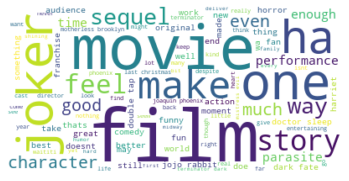

In [23]:
text = ' '.join(review_df['Review_nostop'])

# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=100, background_color="white").generate(text)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

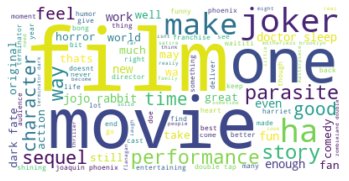

In [24]:
text_fresh = ' '.join(review_df[review_df['Rating']=='fresh']['Review_nostop'])

# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=100, background_color="white").generate(text_fresh)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

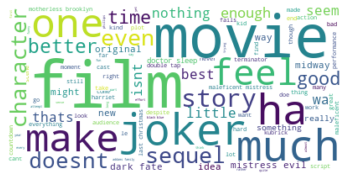

In [25]:
text_rotten = ' '.join(review_df[review_df['Rating']=='rotten']['Review_nostop'])

# Create and generate a word cloud image:
wordcloud = WordCloud(max_words=100, background_color="white").generate(text_rotten)

# Display the generated image:
plt.imshow(wordcloud, interpolation='bilinear')
plt.axis("off")
plt.show()

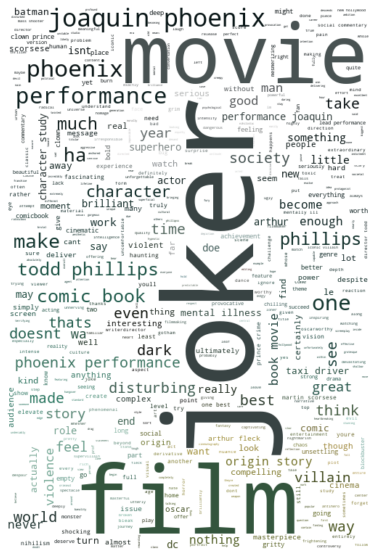

In [26]:
text_joker = ' '.join(review_df[review_df['Movie']=='Joker']['Review_nostop'])
bg_pic = np.array(Image.open('joker-poster-5.jpg'))

# Create and generate a word cloud image:
wordcloud = WordCloud(mask=bg_pic, max_words=500, background_color="white").generate(text_joker)
image_colors = ImageColorGenerator(bg_pic)

# Display the generated image:
plt.figure(figsize=[10,10])
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis("off")
plt.show()

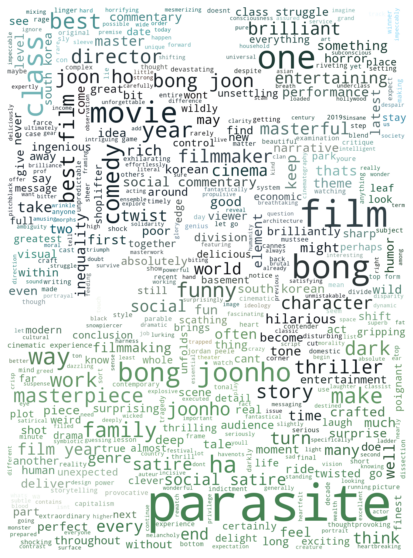

In [27]:
text_parasite = ' '.join(review_df[review_df['Movie']=='Parasite (Gisaengchung)']['Review_nostop'])
bg_pic = np.array(Image.open('parasite.jpg'))

# Create and generate a word cloud image:
wordcloud = WordCloud(mask=bg_pic, max_words=500, background_color="white").generate(text_parasite)
image_colors = ImageColorGenerator(bg_pic)

# Display the generated image:
plt.figure(figsize=[10,10])
plt.imshow(wordcloud.recolor(color_func=image_colors), interpolation='bilinear')
plt.axis("off")
plt.show()

## Critics' Ratings

In [148]:
critic_df = pd.DataFrame(review_df.groupby(['Critic'])['Movie'].count())

In [149]:
fresh_critic_df = pd.DataFrame(review_df[review_df['Rating']=='fresh'].\
                               groupby(['Critic'])['Movie'].count())

In [150]:
rotten_critic_df = pd.DataFrame(review_df[review_df['Rating']=='rotten'].\
                               groupby(['Critic'])['Movie'].count())

In [161]:
critic_number_df = critic_df.join(fresh_critic_df, on='Critic', how='left', rsuffix='_Fresh').\
join(rotten_critic_df, on='Critic', how='left', rsuffix='_Rotten').sort_values(by='Movie', ascending=False).\
fillna(0).astype(int)

In [242]:
critic_number_df.to_csv('critic_number.csv')

## Build a Classifier

In [28]:
# Transform Rating to binary data
review_df['target'] = review_df['Rating'].replace(['rotten', 'fresh'], [0, 1])

In [123]:
# Import libraries
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.feature_extraction.text import TfidfVectorizer

from sklearn.linear_model import LogisticRegression
from sklearn.naive_bayes import GaussianNB
from sklearn.naive_bayes import MultinomialNB
from sklearn.svm import SVC
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

from sklearn.model_selection import learning_curve
from sklearn.model_selection import GridSearchCV
from sklearn.pipeline import Pipeline



In [335]:
def plot_learning_curve(x, y, clf):
    train_sizes, train_scores, test_scores = learning_curve(clf, x, y, 
                                                            train_sizes=np.linspace(0.05, 1, 20),
                                                            cv=5, shuffle=True)
    train_score_mean = train_scores.mean(axis=1)
    test_score_mean = test_scores.mean(axis=1)
    
    plt.subplots(dpi=100)
    plt.plot(train_sizes, train_score_mean, 'o-', color="r",
             label="Training accuracy")
    plt.plot(train_sizes, test_score_mean, 'o-', color="g",
             label="Validation accuracy")
    plt.xlabel("Train size")
    plt.ylabel("Accuracy")
    plt.title('Learning curves')
    plt.legend(loc="best")

    plt.show()
    
    return train_sizes, train_scores, test_scores

In [33]:
def logistic_cv_score(x, y):
    logistic = LogisticRegression()
    accuracy = cross_val_score(logistic, x, y, scoring='accuracy', cv=5)
    return accuracy

First, I test the basic CountVectorizer and TfidfVectorizer without any parameters set and use logistic regression to fit models.

In [271]:
# Use CountVectorizer binary
binary_vectorizer = CountVectorizer(binary=True)
binary_vectorizer.fit(review_df['Review_nostop'])
X_b = binary_vectorizer.transform(review_df['Review_nostop'])

In [272]:
accuracy = logistic_cv_score(X_b, review_df['target'])
print('The mean accuracy is', np.mean(accuracy))

The mean accuracy is 0.6297356012404576


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


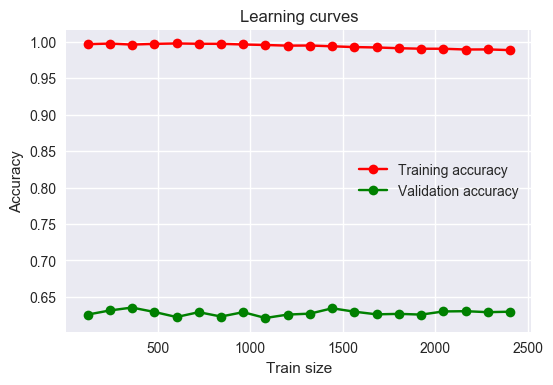

In [336]:
log_reg = LogisticRegression()
train_sizes, train_scores, test_scores = plot_learning_curve(X_b, review_df['target'], log_reg)

In [268]:
# Use CountVectorizer non-binary
count_vectorizer = CountVectorizer()
count_vectorizer.fit(review_df['Review_nostop'])
X_nb = count_vectorizer.transform(review_df['Review_nostop'])

In [269]:
accuracy_nb = logistic_cv_score(X_nb, review_df['target'])
print('The mean accuracy is', np.mean(accuracy_nb))

The mean accuracy is 0.631731720664894


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


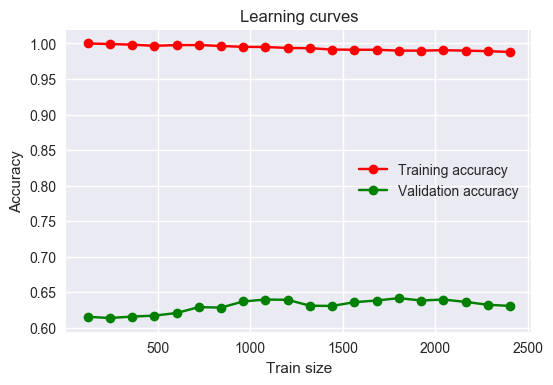

In [337]:
log_reg = LogisticRegression()
train_sizes, train_scores, test_scores = plot_learning_curve(X_nb, review_df['target'], log_reg)

In [265]:
# Use TfidfVectorizer
tf_vectorizer = TfidfVectorizer()
tf_vectorizer.fit(review_df['Review_nostop'])
X_tf = tf_vectorizer.transform(review_df['Review_nostop'])

In [266]:
accuracy_tf = logistic_cv_score(X_tf, review_df['target'])
print('The mean accuracy is', np.mean(accuracy_tf))

The mean accuracy is 0.6636723953985882


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


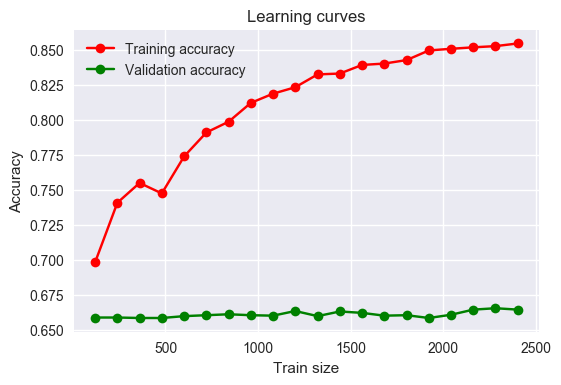

In [338]:
log_reg = LogisticRegression()
train_sizes, train_scores, test_scores = plot_learning_curve(X_tf, review_df['target'], log_reg)

In [347]:
# Use TfidfVectorizer with ngram_range (2, 2) and only keep words which has higher frequency
tf2_vectorizer = TfidfVectorizer(ngram_range=(2, 2))
tf2_vectorizer.fit(review_df['Review_nostop'])
X_tf2 = tf2_vectorizer.transform(review_df['Review_nostop'])

In [231]:
accuracy_tf2 = logistic_cv_score(X_tf2, review_df['target'])
print('The mean accuracy is', np.mean(accuracy_tf2))

The mean accuracy is 0.6583507001066881


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


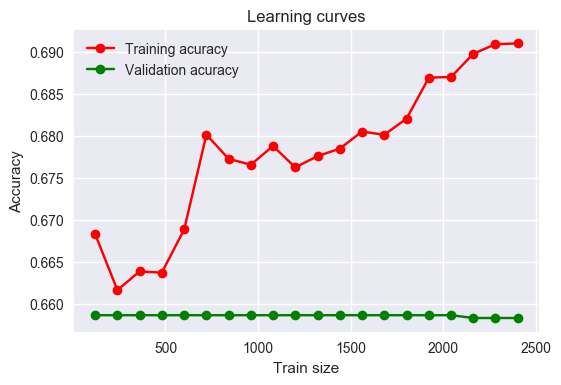

In [278]:
log_reg = LogisticRegression()
train_sizes, train_scores, test_scores = plot_learning_curve(X_tf2, review_df['target'], log_reg)

In [312]:
# Try tuning parameters in logistic regression
parameters = {'C':(1, 10, 100), 'class_weight':({1:2, 0:1}, None), 'penalty': ('l2', 'l1')}
log_reg = LogisticRegression(solver= 'liblinear')
clf = GridSearchCV(log_reg, parameters, cv=5)
clf.fit(X_tf, review_df['target'])
print("Best score: %0.8f" % clf.best_score_, "Best parameter: ", clf.best_estimator_.get_params())

Best score: 0.66367265 Best parameter:  {'C': 1, 'class_weight': None, 'dual': False, 'fit_intercept': True, 'intercept_scaling': 1, 'l1_ratio': None, 'max_iter': 100, 'multi_class': 'warn', 'n_jobs': None, 'penalty': 'l2', 'random_state': None, 'solver': 'liblinear', 'tol': 0.0001, 'verbose': 0, 'warm_start': False}


In [318]:
svc = SVC(kernel='rbf')
accuracy = cross_val_score(svc, X_tf, review_df['target'], scoring='accuracy', cv=5)

/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/svm/base.py:193: FutureWarning: The default value of gamma will change from 'auto' to 'scale' in version 0.22 to account better for unscaled features. Set gamma explicitly to 'auto' or 'scale' to avoid this warning.
  "avoid this warning.", FutureWarning)


In [319]:
np.mean(accuracy)

0.6586829260203093

In [320]:
# Try tuning parameters in logistic regression
parameters = {'C':(1, 10, 100), 'kernel':('linear', 'poly', 'rbf'), 
              'degree':(3, 4), 'gamma':('scale', 'auto')}
svc = SVC()
clf_svc = GridSearchCV(svc, parameters, cv=5)
clf_svc.fit(X_tf, review_df['target'])
print("Best score: %0.8f" % clf_svc.best_score_, "Best parameter: ", clf_svc.best_estimator_.get_params())

Best score: 0.65868263 Best parameter:  {'C': 1, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'poly', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [348]:
# Try tuning parameters in logistic regression
parameters = {'C':(1, 10, 100), 'kernel':('linear', 'poly', 'rbf'), 
              'degree':(3, 4), 'gamma':('scale', 'auto')}
svc = SVC()
clf_svc = GridSearchCV(svc, parameters, cv=5)
clf_svc.fit(X_tf2, review_df['target'])
print("Best score: %0.8f" % clf_svc.best_score_, "Best parameter: ", clf_svc.best_estimator_.get_params())

Best score: 0.65868263 Best parameter:  {'C': 1, 'cache_size': 200, 'class_weight': None, 'coef0': 0.0, 'decision_function_shape': 'ovr', 'degree': 3, 'gamma': 'scale', 'kernel': 'poly', 'max_iter': -1, 'probability': False, 'random_state': None, 'shrinking': True, 'tol': 0.001, 'verbose': False}


In [321]:
# Try tuning parameters (unigram)
clf = MultinomialNB()
accuracy = cross_val_score(clf, X_tf, review_df['target'], scoring='accuracy', cv=5)
np.mean(accuracy)

0.6546857120745601

In [322]:
# Try tuning parameters (bigrams)
clf = MultinomialNB()
accuracy = cross_val_score(clf, X_tf2, review_df['target'], scoring='accuracy', cv=5)
np.mean(accuracy)

0.6563545806822515

In [331]:
# Try tuning parameters in naive bayes (unigram)
parameters = {'alpha':(0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 1)}
naive_bayes = MultinomialNB()
clf_nb = GridSearchCV(naive_bayes, parameters, cv=5)
clf_nb.fit(X_tf, review_df['target'])
print("Best score: %0.8f" % clf_nb.best_score_, "Best parameter: ", clf_nb.best_estimator_.get_params())

Best score: 0.65768463 Best parameter:  {'alpha': 0.5, 'class_prior': None, 'fit_prior': True}


In [327]:
# Try tuning parameters in naive bayes (bigrams)
parameters = {'alpha':(0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 1)}
naive_bayes = MultinomialNB()
clf_nb = GridSearchCV(naive_bayes, parameters, cv=5)
clf_nb.fit(X_tf2, review_df['target'])
print("Best score: %0.8f" % clf_nb.best_score_, "Best parameter: ", clf_nb.best_estimator_.get_params())

Best score: 0.65635396 Best parameter:  {'alpha': 1, 'class_prior': None, 'fit_prior': True}


/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)
/Library/Frameworks/Python.framework/Versions/3.7/lib/python3.7/site-packages/sklearn/linear_model/logistic.py:432: FutureWarning: Default solver will be changed to 'lbfgs' in 0.22. Specify a solver to silence this warning.
  FutureWarning)


The mean accuracy is 0.6586829260203093


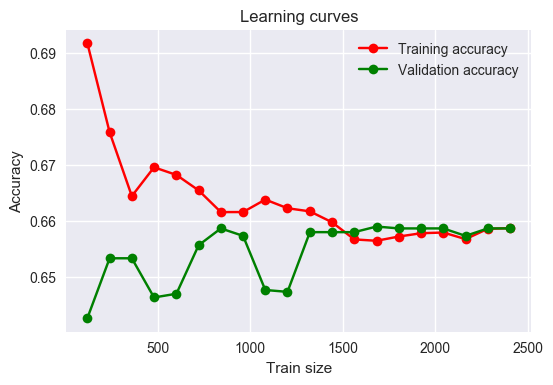

In [345]:
# Use TfidfVectorizer with min_df=0.05
vectorizer = TfidfVectorizer(min_df=0.06)
vectorizer.fit(review_df['Review_nostop'])
X_tf_part = vectorizer.transform(review_df['Review_nostop'])
accuracy_tf_part = logistic_cv_score(X_tf_part, review_df['target'])
print('The mean accuracy is', np.mean(accuracy_tf_part))
log_reg = LogisticRegression()
train_sizes, train_scores, test_scores = plot_learning_curve(X_tf_part, review_df['target'], log_reg)

In [346]:
# Try tuning parameters in naive bayes (bigrams)
parameters = {'alpha':(0.1, 0.2, 0.3, 0.5, 0.6, 0.7, 0.8, 1)}
naive_bayes = MultinomialNB()
clf_nb = GridSearchCV(naive_bayes, parameters, cv=5)
clf_nb.fit(X_tf_part, review_df['target'])
print("Best score: %0.8f" % clf_nb.best_score_, "Best parameter: ", clf_nb.best_estimator_.get_params())

Best score: 0.65834997 Best parameter:  {'alpha': 0.1, 'class_prior': None, 'fit_prior': True}
